In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx
from itertools import combinations

In [2]:
class ProbGraph():
    
    
    def __init__(self, edgelist):
        '''Initialize a Bayesian graph'''
        self.edgelist = edgelist
        self.G = nx.from_edgelist(self.edgelist, create_using=nx.DiGraph)
        
        
    def _draw_graph(self,G):
        '''Simple graph draw function'''
        layout = nx.spring_layout(G)
        fig, ax = plt.subplots(figsize = (8,6))
        nx.draw(G, with_labels = True, alpha = 0.8, node_size= 1000, pos = layout)
        plt.show()
        
        
    def get_graph(self):
        '''Return the networkx graph'''
        return self.G
    
    
    def draw_full_graph(self):
        '''Draw full bayesian network'''
        self._draw_graph(self.G)
       
    
    def markov_linkage(self, n):
        '''Get markov linkage, which is a subgraph of the bayesian network'''
        # find all childrens of a node
        childs = list(self.G.successors(n))
        
        # find all parents of a node
        parents = list(self.G.predecessors(n))
        
        # find all parents of all childs of n
        childs_parents = [list(self.G.predecessors(c)) for c in childs]
        childs_parents = [n for l in childs_parents for n in l]
        
        # make a subgraph
        subnodes = list(set(childs + parents + childs_parents + [n]))
        subG = self.G.subgraph(subnodes)
        return subG
    
    
    def draw_markov_linkage(self,n):
        '''Draw markov linkage on a give node n'''
        subG = self.markov_linkage(n)
        self._draw_graph(subG)
        
        
    def D_separate(self, joints, givens = None):
        
        '''Preform d-separation'''
        
        givens = givens if givens else []

        # find all variables mentioned
        variables = givens + joints
        subsets = []

        # loop through variables, find parents and parents of parenets
        for variable in variables:
            all_edges = list(nx.edge_dfs(G,variable, orientation='reverse'))
            subset = [[s,t] for s,t, _ in all_edges]
            subsets.append([n for l in subset for n in l])
            
        # subset should also include original variables, but exclude
        subsets = list(set([n for l in subsets for n in l]).union(joints))

        # constract ancestral graph A
        A = nx.DiGraph(G.subgraph(subsets))

        # for all nodes in A, connect parents of joint childs
        for node in A.nodes():
            predecessors = list(A.predecessors(node))
            if len(predecessors) >=2:
                for u,v in list(combinations(predecessors,2)):
                    A.add_edge(u,v)

        # unorient the graph 
        A = nx.Graph(A)

        # remove the givens
        subsets = [n for n in A.nodes() if n not in givens]

        A = nx.Graph(A.subgraph(subsets))
        
        return A

**Initialize and darw a graph**

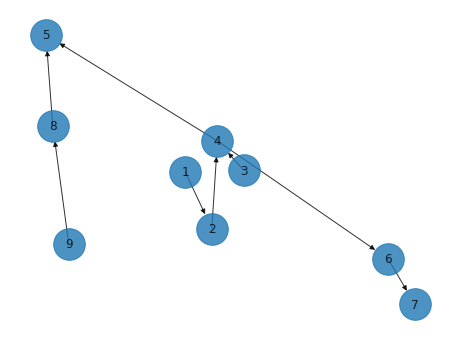

In [3]:
edge_list = [[1,2],[2,4],[3,4],[4,5],[4,6],[6,7],[8,5],[9,8]]
PGraph = ProbGraph(edge_list)
PGraph.draw_full_graph()

**Node 4 is the only child of node 3**        
**Node 4 has another parent 2**     
**Markov linkage include nodes $N = \{2,3,4\}$**

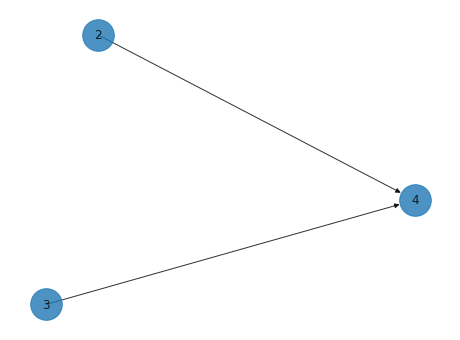

In [4]:
PGraph.draw_markov_linkage(3)

**Node 6 has a parent 4 and a son 7**
**Markov linkage include nodes $N = \{4,6,7\}$**

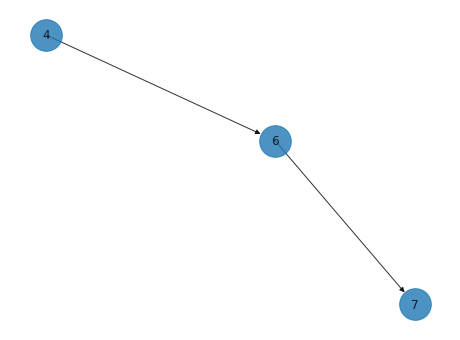

In [5]:
PGraph.draw_markov_linkage(6)

**Test on another graph**

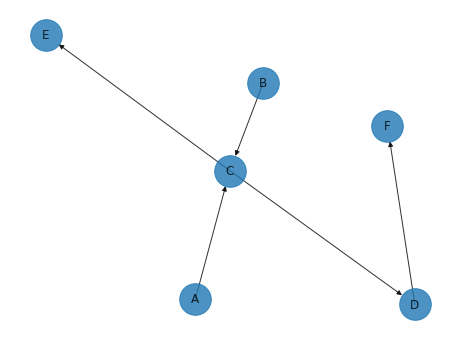

In [6]:
edge_list = [['A','C'],['B','C'],['C','D'],['C','E'],['D','F']]
PGraph = ProbGraph(edge_list)
PGraph.draw_full_graph()

*C has parents A and B, children D, E, which have no other parents*
*$N = \{A,B,C,D,E\}$*

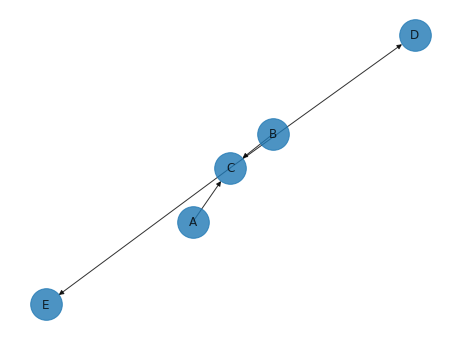

In [7]:
PGraph.draw_markov_linkage('C')

**Next we do D-separation**

In [8]:
edge_list = [['A','C'],['B','C'],['C','D'],['C','E'],['D','F']]
G = nx.from_edgelist(edge_list, create_using=nx.DiGraph)

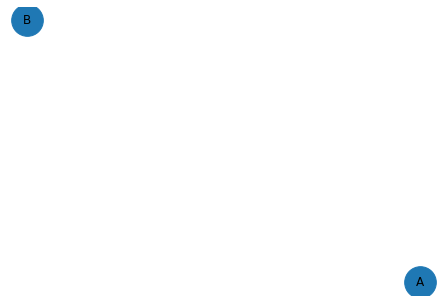

In [9]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['A','B'])

nx.draw(A, with_labels = True, node_size = 1000)

**There's not edge between A & B, we say A and B are absolutely independent**

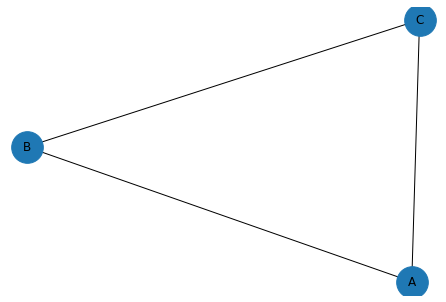

In [12]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['A','B'],givens =  ['D','F'])

nx.draw(A, with_labels = True, node_size = 1000)

**There is an edge between A and B, A and B are not required to be independent give D and F**

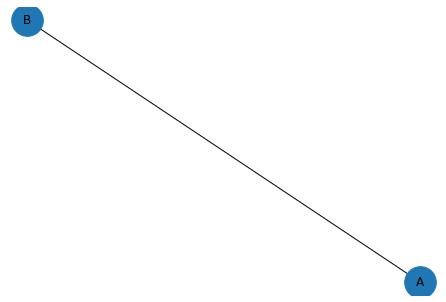

In [13]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['A','B'],givens =  ['C'])

nx.draw(A, with_labels = True, node_size = 1000)

**Has edge: A and B are not required to be indepndent give C**

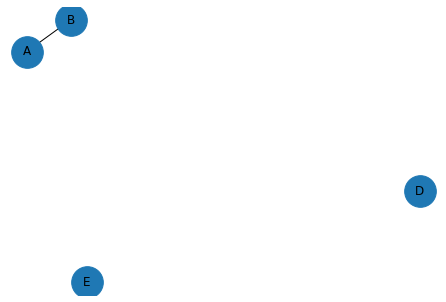

In [14]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['D','E'],givens =  ['C'])

nx.draw(A, with_labels = True, node_size = 1000)

**D and E are conditionally independent give C**

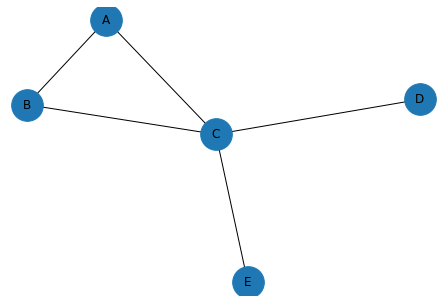

In [15]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['D','E'])

nx.draw(A, with_labels = True, node_size = 1000)

**D and E are connected through C, they are not absolute indendent**

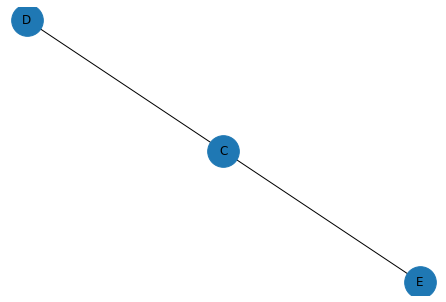

In [16]:
PGraph = ProbGraph(edgelist=edge_list)

A = PGraph.D_separate(joints = ['D','E'],givens = ['A','B'])

nx.draw(A, with_labels = True, node_size = 1000)

**Given A, and B, DE are connected through C, not conditionally indepndent**

All the tests are passed, haha

**There are still more complex cases that are not considered yet. TO BE IMPLEMENTED...**